In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [0]:
import imgaug as ia
from imgaug import augmenters as iaa
ia.seed(4)

In [0]:
x  = np.load('/content/drive/My Drive/Unet_correctness/image_train.npz')
y = np.load('/content/drive/My Drive/Unet_correctness/label_train.npz')
x = x['image_train']
y = y['label_train']

In [0]:
x_256 = iaa.Resize((256,256))(images = (x * 255).astype('uint8'))
y_256 = iaa.Resize((256,256))(images = y)
x_256 = x_256/255

In [0]:
gamma = iaa.GammaContrast(1.25)(images = x_256)
log = iaa.LogContrast(0.9)(images = x_256)
sigmoid = iaa.SigmoidContrast(4)(images = x_256)
big_x = np.vstack([x_256,gamma,log,sigmoid])
big_y = np.vstack([y_256,  y_256   , y_256     ,y_256])


In [0]:
x_train, x_test, y_train, y_test = train_test_split(big_x, big_y, test_size = 0.2, random_state = 103)

In [0]:
x_train = np.reshape(x_train,(307,256,256,1))
x_test = np.reshape(x_test,(77,256,256,1))
y_train = np.reshape(y_train,(307,256,256,1))
y_test = np.reshape(y_test,(77,256,256,1))

In [10]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((307, 256, 256, 1), (77, 256, 256, 1), (307, 256, 256, 1), (77, 256, 256, 1))

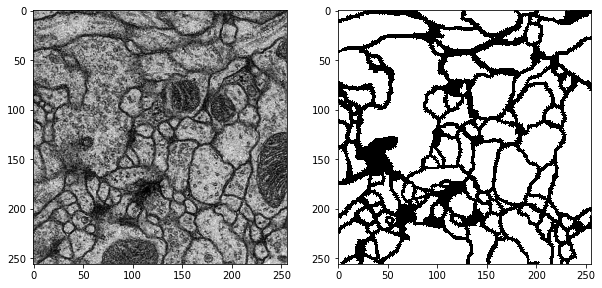

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(x_train[177].reshape(256,256),cmap = 'gray')
ax[1].imshow(y_train[177].reshape(256,256),cmap = 'gray')


In [12]:
from keras.layers import Conv2D,Dropout,BatchNormalization,Activation,UpSampling2D,MaxPooling2D,Input,concatenate
from keras.optimizers import *
from keras.losses import *
from keras.models import Model

Using TensorFlow backend.


In [0]:
def satellite(input_img):
  
  conv_1 = Conv2D(filters = 32,kernel_size=(3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(input_img)
  batch_conv1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_1)
  activate_batch_conv1 = Activation('relu')(batch_conv1)

  conv_2 = Conv2D(filters = 32,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer = 'he_normal')(activate_batch_conv1)
  batch_conv2 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_2)
  activate_batch_conv2 = Activation('relu')(batch_conv2)
  
  
  ######### POOL_Start
  pool_1 = MaxPooling2D(pool_size = (2,2),strides= (2,2))(activate_batch_conv2)
  pool_1 = Dropout(0.025)(pool_1)  
  ######### Pool_End
  
  
  conv_3 = Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(pool_1)
  batch_conv3 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_3)
  activate_batch_conv3 = Activation('relu')(batch_conv3)

  conv_4 = Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv3)
  batch_conv4 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_4)
  activate_batch_conv4 = Activation('relu')(batch_conv4)
  
  
  ######### POOL_Start
  pool_2 = MaxPooling2D(pool_size = (2,2),strides= (2,2))(activate_batch_conv4)
  pool_2 = Dropout(0.025)(pool_2)  
  ######### POOL_End
  
  
  conv_5 = Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(pool_2)
  batch_conv5 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_5)
  activate_batch_conv5 = Activation('relu')(batch_conv5)

  conv_6 = Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv5)
  batch_conv6 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_6)
  activate_batch_conv6 = Activation('relu')(batch_conv6)
  
  
  ######### POOL_Start
  pool_3 = MaxPooling2D(pool_size = (2,2),strides= (2,2))(activate_batch_conv6)
  pool_3 = Dropout(0.025)(pool_3)
  ######### POOL_End
  
  
  conv_7 = Conv2D(filters = 256,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(pool_3)
  batch_conv7 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_7)
  activate_batch_conv7 = Activation('relu')(batch_conv7)

  conv_8 = Conv2D(filters = 256,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv7)
  batch_conv8 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_8)
  activate_batch_conv8 = Activation('relu')(batch_conv8)
  
  
  #########  POOL
  pool_4 = MaxPooling2D(pool_size = (2,2),strides= (2,2))(activate_batch_conv8)
  pool_4 = Dropout(0.025)(pool_4)
  #########  POOL
  
  
  conv_9 = Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(pool_4)
  batch_conv9 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_9)
  activate_batch_conv9 = Activation('relu')(batch_conv9)

  conv_10 = Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv9)
  batch_conv10 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_10)
  activate_batch_conv10 = Activation('relu')(batch_conv10)
  
  
  ################Upsample-1 Start
  #up1 = Lambda(lambda activate_batch_conv10: tf.image.resize_bicubic(activate_batch_conv10, (32,32), align_corners=True))(activate_batch_conv10)
  up1 = UpSampling2D(size = (2,2),interpolation = 'bilinear')(activate_batch_conv10)
  up1_conv = Conv2D(filters = 256,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(up1)
  merge_up1 = concatenate([activate_batch_conv8,up1_conv])
  drop_up1 = Dropout(0.025)(merge_up1)
  
  conv_11 = Conv2D(filters = 256,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(drop_up1)
  batch_conv11 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_11)
  activate_batch_conv11 = Activation('relu')(batch_conv11)
  
  conv_12 = Conv2D(filters = 256,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv11)
  batch_conv12 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_12)
  activate_batch_conv12 = Activation('relu')(batch_conv12)
  
  ################Upsample-1 End
  
  
  ################Upsample-2 Start
  #up2 = Lambda(lambda activate_batch_conv12: tf.image.resize_bicubic(activate_batch_conv12, (64,64), align_corners=True))(activate_batch_conv12)
  up2 = UpSampling2D(size = (2,2),interpolation = 'bilinear')(activate_batch_conv12)
  up2_conv = Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(up2)
  merge_up2 = concatenate([activate_batch_conv6,up2_conv])
  drop_up2 = Dropout(0.025)(merge_up2)
  
  conv_13 = Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(drop_up2)
  batch_conv13 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_13)
  activate_batch_conv13 = Activation('relu')(batch_conv13)
  
  conv_14 = Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv13)
  batch_conv14 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_14)
  activate_batch_conv14 = Activation('relu')(batch_conv14)
  
  ################Upsample-2 End
  
  
  ################Upsample-3 Start
  #up3 = Lambda(lambda activate_batch_conv14: tf.image.resize_bicubic(activate_batch_conv14, (128,128), align_corners=True))(activate_batch_conv14)
  up3 = UpSampling2D(size = (2,2),interpolation = 'bilinear')(activate_batch_conv14)
  up3_conv = Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(up3)
  merge_up3 = concatenate([activate_batch_conv4,up3_conv])
  drop_up3 = Dropout(0.025)(merge_up3)
  
  conv_15 = Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(drop_up3)
  batch_conv15 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_15)
  activate_batch_conv15 = Activation('relu')(batch_conv15)
  
  conv_16 = Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv15)
  batch_conv16 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_16)
  activate_batch_conv16 = Activation('relu')(batch_conv16)

  ################Upsample-3 End
  
  
  ################Upsample-4 Start
  #up4 = Lambda(lambda activate_batch_conv16: tf.image.resize_bicubic(activate_batch_conv16, (256,256), align_corners=True))(activate_batch_conv16)
  up4 = UpSampling2D(size = (2,2),interpolation = 'bilinear')(activate_batch_conv16)
  up4_conv = Conv2D(filters = 32,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(up4)
  merge_up4 = concatenate([activate_batch_conv2,up4_conv])
  drop_up4 = Dropout(0.025)(merge_up4)
  
  conv_17 = Conv2D(filters = 32,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(drop_up4)
  batch_conv17 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_17)
  activate_batch_conv17 = Activation('relu')(batch_conv17)
  
  conv_18 = Conv2D(filters = 32,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv17)
  batch_conv18 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_18)
  activate_batch_conv18 = Activation('relu')(batch_conv18)
  
  conv_19 = Conv2D(filters = 2,kernel_size = (3,3),strides = (1,1),activation = 'relu',padding = 'same',kernel_initializer='he_normal')(activate_batch_conv18)
  conv_20 = Conv2D(filters = 1,kernel_size = (1,1),strides = (1,1),activation = 'sigmoid',padding = 'same',kernel_initializer='he_normal')(conv_19)

  ################Upsample-4 End
  model = Model(input = [input_img], output =[conv_20])
  return model
  



In [0]:
input_img = Input((256,256,1))
model = satellite(input_img)
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

In [15]:
model.fit(x_train, y_train, batch_size=4, epochs=100,validation_data=(x_test, y_test))



Train on 307 samples, validate on 77 samples
Epoch 1/100
307/307 [==============================] - 20s 64ms/step - loss: 0.6353 - acc: 0.8403 - val_loss: 0.5960 - val_acc: 0.8736
Epoch 2/100
307/307 [==============================] - 7s 24ms/step - loss: 0.5729 - acc: 0.8956 - val_loss: 0.5645 - val_acc: 0.8882
Epoch 3/100
307/307 [==============================] - 7s 24ms/step - loss: 0.5462 - acc: 0.9028 - val_loss: 0.5359 - val_acc: 0.8988
Epoch 4/100
307/307 [==============================] - 7s 24ms/step - loss: 0.5225 - acc: 0.9073 - val_loss: 0.5136 - val_acc: 0.9030
Epoch 5/100
307/307 [==============================] - 7s 24ms/step - loss: 0.4998 - acc: 0.9112 - val_loss: 0.4969 - val_acc: 0.9010
Epoch 6/100
307/307 [==============================] - 7s 24ms/step - loss: 0.4794 - acc: 0.9137 - val_loss: 0.4711 - val_acc: 0.9108
Epoch 7/100
307/307 [==============================] - 7s 24ms/step - loss: 0.4598 - acc: 0.9163 - val_loss: 0.4521 - val_acc: 0.9133
Epoch 8/100
30

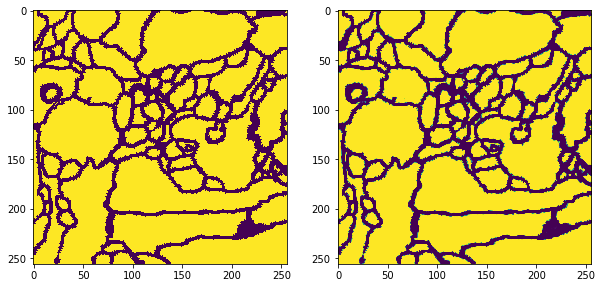

In [31]:
test_x = model.predict(x_test[55].reshape(1,256,256,1))
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(y_test[55].reshape(256,256)) #actual
ax[1].imshow(test_x.reshape(256,256))     #predicted(apply threshold if needed)

In [0]:
def calc_iou(real,pred):
  num = np.logical_and(real,pred)
  den = np.logical_or(real,pred)
  
  return np.sum(num) / np.sum(den)

In [0]:
iou_train = []
for i,j in zip(x_train,y_train):
  
  dummy = model.predict(i.reshape(1,256,256,1))
  img = dummy.copy()
  img[dummy< 0.1] = 0
  img[dummy >= 0.1] = 1
  iou_train.append(calc_iou(j.reshape(256,256),img.reshape(256,256)))

In [0]:
iou_test = []
for i,j in zip(x_test,y_test):
  
  dummy = model.predict(i.reshape(1,256,256,1))
  img = dummy.copy()
  img[dummy< 0.1] = 0
  img[dummy >= 0.1] = 1
  iou_test.append(calc_iou(j.reshape(256,256),img.reshape(256,256)))

In [26]:
print("Mean IOU on training data %f"%(np.mean(np.array(iou_train))))
print("Mean IOU on test data %f"%(np.mean(np.array(iou_test))))

Mean IOU on training data 0.970580
Mean IOU on test data 0.964296
